## 서포트 벡터 머신 실습

python의 scikit-learn 패키지를 이용해 서포트 벡터 머신을 직접 실행


### 데이터 불러오기 및 분할하기
cancer dataset을 그대로 이용


In [135]:
from sklearn import datasets
import numpy as np
data = datasets.load_breast_cancer()

x = data['data']
y = data['target']

print(x.shape, y.shape)

(569, 30) (569,)


In [136]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 - 6:2:2 비율
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(341, 30) (114, 30) (114, 30)


### 모델 학습 및 평가하기

Scikit-learn에서 제공하는 [svm](https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm) 모듈에는 다양한 서포트 벡터 관련 모델이 포함되어 있다. 이들 중 SVC(Support Vector Classifier)가 수업 시간에 배웠던 서포트 벡터 머신에 해당한다. 입력 변수를 살펴보면, kernel이나 C 값 등을 조절할 수 있다는 것을 알 수 있다.

In [137]:
from sklearn import svm

In [138]:
# To-Do : Linear SVM 학습하기

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(x_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [139]:
# To-Do : Linear SVM accuracy 계산하기

print("Train Accuracy : {}".format(svm_clf.score(x_train, y_train)))
print("Validation Accuracy : {}".format(svm_clf.score(x_val, y_val)))
print("Test Accuracy : {}".format(svm_clf.score(x_test, y_test)))

Train Accuracy : 0.9736070381231672
Validation Accuracy : 0.9649122807017544
Test Accuracy : 0.956140350877193


In [140]:
# TODO: 여러 가지 kernel을 사용해 SVM 학습하고 accuracy 계산하기
kernels = ['poly','rbf','sigmoid']
accuracy = {}
for kernel in kernels:
  svm_clf = svm.SVC(kernel =kernel)
  svm_clf.fit(x_train, y_train)
  accuracy[kernel] = svm_clf.score(x_val, y_val)

accuracy

{'poly': 0.9210526315789473,
 'rbf': 0.9210526315789473,
 'sigmoid': 0.4473684210526316}

수업 시간에 RBF(가우시안) 커널을 사용할 때 C와 gamma의 변화에 따른 결정 경계의 변화를 설명한 바 있다. 이를 확인하기 위해, C와 gamma의 값을 아래의 네 가지 종류 중에서 골라 총 16가지의 조합에 대한 SVM을 학습하고 분류 accuracy를 계산해 보자.

In [141]:
# To-Do : 각 조합에 대해 SVM 학습하고 accuracy 계산하기
C = [0.1, 1, 10, 100, 1000]
Gamma = [0.00001, 0.0001, 0.001, 0.1 ]

for c in C:
  for gamma in Gamma:
    print("===========================================")
    svm_clf = svm.SVC(kernel='rbf', C=c, gamma=gamma)
    svm_clf.fit(x_train, y_train)
    print(f"accuracy of C =  {c}, gamma = {gamma} : {svm_clf.score(x_val, y_val)}")


accuracy of C =  0.1, gamma = 1e-05 : 0.9385964912280702
accuracy of C =  0.1, gamma = 0.0001 : 0.9298245614035088
accuracy of C =  0.1, gamma = 0.001 : 0.6491228070175439
accuracy of C =  0.1, gamma = 0.1 : 0.6491228070175439
accuracy of C =  1, gamma = 1e-05 : 0.9473684210526315
accuracy of C =  1, gamma = 0.0001 : 0.9473684210526315
accuracy of C =  1, gamma = 0.001 : 0.8947368421052632
accuracy of C =  1, gamma = 0.1 : 0.6491228070175439
accuracy of C =  10, gamma = 1e-05 : 0.9649122807017544
accuracy of C =  10, gamma = 0.0001 : 0.9385964912280702
accuracy of C =  10, gamma = 0.001 : 0.8947368421052632
accuracy of C =  10, gamma = 0.1 : 0.6491228070175439
accuracy of C =  100, gamma = 1e-05 : 0.9473684210526315
accuracy of C =  100, gamma = 0.0001 : 0.956140350877193
accuracy of C =  100, gamma = 0.001 : 0.8947368421052632
accuracy of C =  100, gamma = 0.1 : 0.6491228070175439
accuracy of C =  1000, gamma = 1e-05 : 0.9473684210526315
accuracy of C =  1000, gamma = 0.0001 : 0.94736

In [142]:
# To-Do : 가장 좋다고 판단되는 SVM 모델로 test data에 대한 정확도 확인하기
from sklearn.metrics import accuracy_score

best_svm = svm.SVC(kernel='rbf', C=10, gamma = 0.000001)
best_svm.fit(x_train, y_train)
pred_test = best_svm.predict(x_test)
print("Test Accuracy : {}".format(accuracy_score(y_test, pred_test)))
print('Test Accuracy : {}'.format(best_svm.score(x_test, y_test)))

Test Accuracy : 0.9035087719298246
Test Accuracy : 0.9035087719298246


### Grid Search

위와 같이 다양한 하이퍼파라미터의 조합을 실험하여 최적의 조합을 찾는 것을 Grid Search라고 한다.

In [143]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

param_grid = {'C': [1, 10, 100, 1000],
              'gamma' : [0.00001, 0.0001, 0.001, 0.01]}



In [144]:
# GridSearchCV를 이용해 분류하기

svm_grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=4, scoring='accuracy')
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [145]:
# 최적의 조합과 그 때의 점수 알아보기

print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 1000, 'gamma': 1e-05}
0.9450589970501474


In [146]:
# To-Do : 최적의 모델로 계산한 test 정확도

pred_test_grid = svm_grid.best_estimator_.predict(x_test)
print("Test Accuracy : {}".format(accuracy_score(y_test, pred_test_grid)))

Test Accuracy : 0.956140350877193


### 추가 예제 : Face Recognition

SVM의 우수한 성능에 대해 수업 시간에 언급한 바 있다. 이를 체감할 수 있는 좋은 예시 중 하나가 대표적인 패턴 인식 문제인 Face Recognition이다. Face Recognition에서 SVM이 어떻게 적용되며 어떤 성능을 낼 수 있는지 알아보자. 

In [147]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


아래의 코드를 통해 데이터의 일부를 확인 가능


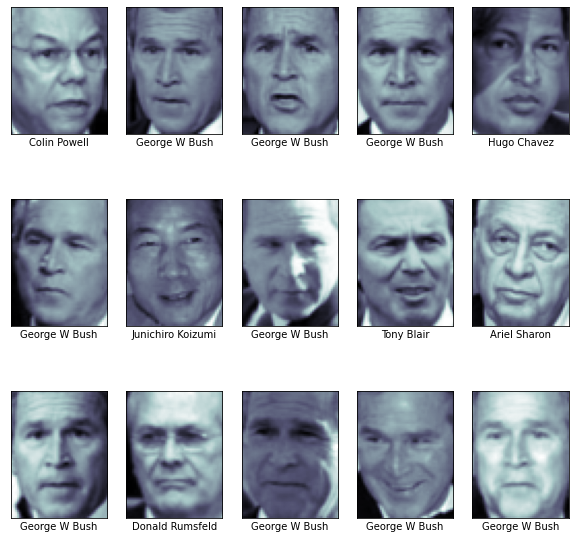

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(3, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

일반적인 SVM은 범주가 두 종류여야 잘 작동하는데, 주어진 데이터는 분류해야 할 범주가 여러 개이다. 그러나 SVC 모델은 이러한 경우에 대해서도 잘 작동할 수 있도록 구성되어 있다. [설명](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)을 잘 읽어보면서 수업 시간에 배웠던, 두 가지 이상의 범주를 분류하는 방법이 어디에 나와 있는지 한 번 찾아보자.

In [149]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)

(808, 2914) (270, 2914) (270, 2914)


In [150]:
# To-Do : class_weight 파라미터를 이용해 svm 학습하기

svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(x_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

accuracy :  0.7481481481481481


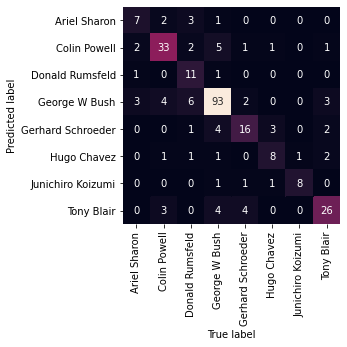

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

pred_test = svm.predict(x_test)
print('accuracy : ', accuracy_score(y_test, pred_test))
mat = confusion_matrix(y_test, pred_test)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=faces.target_names, 
            yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

주어진 데이터(사진)의 크기는 62*47=2914 픽셀로, 그 동안 다루었던 데이터에 비해 상당히 큰 차원임을 알 수 있다. 이를 적정 수준으로 줄여 주기 위해, [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)를 시행한다. 이를 통해 2914차원의 데이터를 150차원으로 줄일 수 있다.

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, whiten=True, random_state=1)

링크를 참조하여 PCA를 training 데이터로 학습하고, 이를 다시 training 데이터에 적용하여 얻은 150차원 데이터를 x_pca_train 이라 하자.

In [153]:
# To-Do : PCA 학습 및 적용하기
print(x_train.shape)
x_pca_train = pca.fit_transform(x_train)
print(x_pca_train.shape)

(808, 2914)
(808, 150)


In [154]:
svm_pca =  SVC(kernel='rbf', class_weight='balanced')
svm_pca.fit(x_pca_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [155]:
# To-Do : Test data에 대한 예측 수행하기
x_pca_test = pca.transform(x_test)
pred_pca_test = svm_pca.predict(x_pca_test)


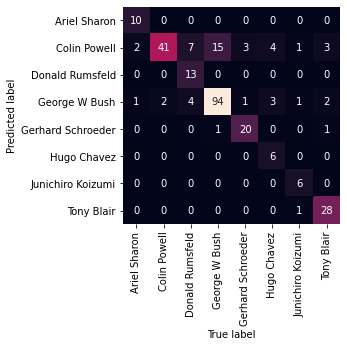

In [156]:

mat = confusion_matrix(y_test, pred_pca_test)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=faces.target_names, 
            yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show();

In [157]:
# To-Do : param_grid 및 GridSearchCV 객체 생성 후 학습하고 최적의 조합 찾기

param_grid = {'C': [1, 10, 100, 1000],
              'gamma' : [0.00001, 0.0001, 0.001, 0.01, 'scale'], 
              'class_weight' : ['balanced', None], 
              'decision_function_shape' : ['ovo', 'ovr']}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=4, scoring='accuracy')
grid_search.fit(x_pca_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [158]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 0.0001}
0.790841584158416


accuracy :  0.8185185185185185


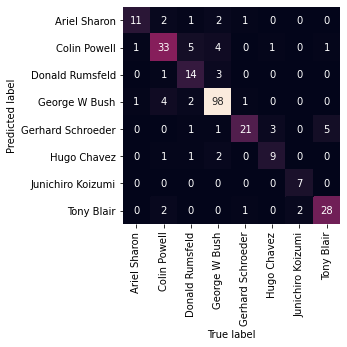

In [159]:
# To-Do : GridSearchCV로 찾은 조합의 모델로 accuracy와 confusion matrix 그리기
pred_pca_grid_test = grid_search.best_estimator_.predict(x_pca_test)
mat = confusion_matrix(y_test, pred_pca_grid_test)
print('accuracy : ', accuracy_score(y_test, pred_pca_grid_test))


sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=faces.target_names, 
            yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()